In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
X = StandardScaler().fit_transform(X)


In [4]:
# Set DBSCAN parameters
eps = 0.5  # Maximum distance between two samples for them to be considered in the same neighborhood
min_samples = 5  # Minimum number of samples in a neighborhood for a point to be considered a core point

In [5]:
# Fit DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

In [6]:
# Number of clusters and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

In [7]:
print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

Estimated number of clusters: 2
Estimated number of noise points: 34


In [8]:
# Visualization
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

<Figure size 1000x600 with 0 Axes>

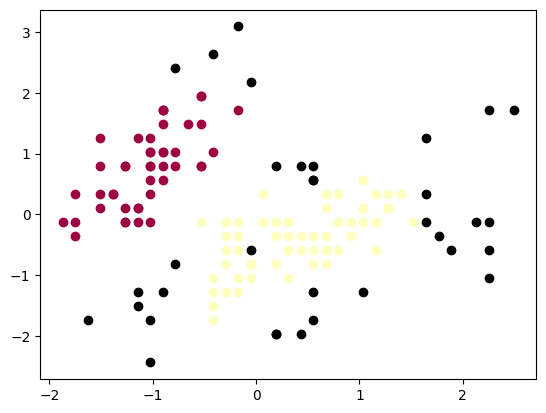

In [9]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise
    class_member_mask = (labels == k)
    plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1], color=col, label=f'Cluster {k}')

C:\Users\Admin\AppData\Local\Temp\ipykernel_9088\4161307888.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


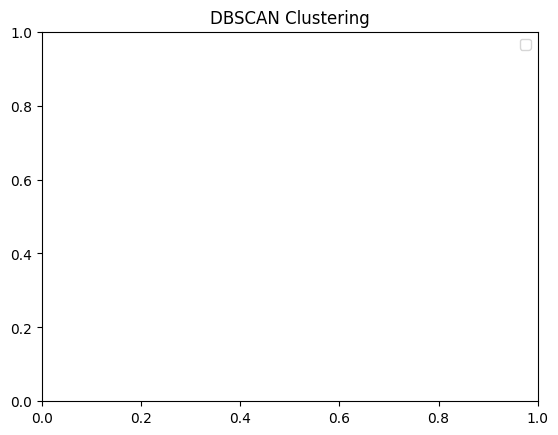

In [10]:
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()